In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
stock = 'TSLA'
data = yf.download(stock,'2010-01-01','2023-05-19')
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [3]:
price = data['Close']
price

Date
2010-06-29      1.592667
2010-06-30      1.588667
2010-07-01      1.464000
2010-07-02      1.280000
2010-07-06      1.074000
                 ...    
2023-05-12    167.979996
2023-05-15    166.350006
2023-05-16    166.520004
2023-05-17    173.860001
2023-05-18    176.889999
Name: Close, Length: 3245, dtype: float64

<Axes: xlabel='Date'>

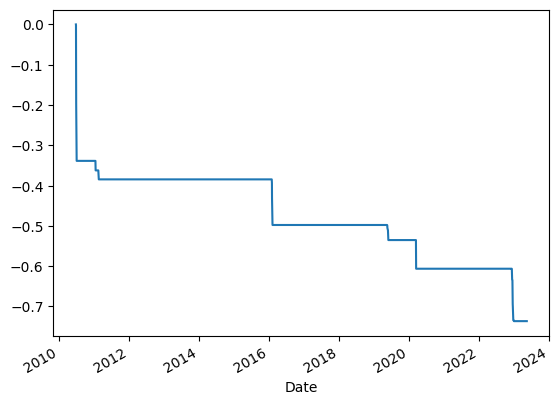

In [4]:
roll_max = data['Close'].rolling(len(price)-1,min_periods=1).max()
daily_drawdown = data['Close']/roll_max - 1.0
mdd = daily_drawdown.rolling(len(price)-1,min_periods=1).min()
mdd.plot()

In [5]:
print(f"Maximum Drawdown for the given period is: {mdd[-1]*100} %")


Maximum Drawdown for the given period is: -73.63221744219119 %


In [6]:
returns = data['Close'].resample('D').ffill().pct_change().to_numpy()
returns[0] = 0
returns

array([ 0.        , -0.00251148, -0.07847274, ...,  0.00102193,
        0.04407877,  0.01742781])

In [7]:
cumulative_ret =( 1+returns).cumprod()
cumulative_ret

array([  1.        ,   0.99748852,   0.91921287, ..., 104.55418866,
       109.1628083 , 111.0652768 ])

In [8]:
print(f"Cumulative return of stock is {cumulative_ret[-1]*100}%")

Cumulative return of stock is 11106.52768033908%


In [9]:
yearly_returns = data['Close'].resample('Y').ffill().pct_change()
yearly_returns

Date
2010-12-31         NaN
2011-12-31    0.072475
2012-12-31    0.185924
2013-12-31    3.441394
2014-12-31    0.478495
2015-12-31    0.079133
2016-12-31   -0.109662
2017-12-31    0.457017
2018-12-31    0.068894
2019-12-31    0.257001
2020-12-31    7.434370
2021-12-31    0.497556
2022-12-31   -0.650315
2023-12-31    0.436029
Freq: A-DEC, Name: Close, dtype: float64

In [10]:
monthly_returns = data['Close'].resample('M').ffill().pct_change()
monthly_returns

Date
2010-06-30         NaN
2010-07-31   -0.163240
2010-08-31   -0.023069
2010-09-30    0.047741
2010-10-31    0.070063
                ...   
2023-01-31    0.406235
2023-02-28    0.187565
2023-03-31    0.008507
2023-04-30   -0.207992
2023-05-31    0.076563
Freq: M, Name: Close, Length: 156, dtype: float64

In [11]:
avg_yearly_return = yearly_returns.mean()
print(f"Average yearly return is : {avg_yearly_return*100}%")

Average yearly return is : 97.29469244367196%


In [12]:
sharpe_ratio = (avg_yearly_return - 0.07)/(monthly_returns.std())
print(f"Sharpe ratio is : {sharpe_ratio*10}")

Sharpe ratio is : 48.63585985681672


In [13]:
neg_monthly_returns = monthly_returns[monthly_returns < 0]
neg_monthly_returns

Date
2010-07-31   -0.163240
2010-08-31   -0.023069
2010-12-31   -0.246250
2011-01-31   -0.095005
2011-02-28   -0.008714
                ...   
2022-09-30   -0.037589
2022-10-31   -0.142168
2022-11-30   -0.144326
2022-12-31   -0.367334
2023-04-30   -0.207992
Name: Close, Length: 73, dtype: float64

In [14]:
std_neg = neg_monthly_returns.std()
sortino = ((avg_yearly_return - 0.07)*10.0)/std_neg
print(f"Sortino Ratio: {sortino}")

Sortino Ratio: 125.44804868504998
